In [22]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support, make_scorer, recall_score, f1_score, confusion_matrix, precision_score, balanced_accuracy_score
from sklearn.metrics import fbeta_score, classification_report


from sklearn.preprocessing import LabelEncoder, MinMaxScaler
         

from sklearn.model_selection import learning_curve, validation_curve

In [111]:
df = pd.read_csv("data/malicious_01.csv")
Xdf = df.drop(columns=["INCIDENT_ID","DATE", "MALICIOUS_OFFENSE"])
y_mal = df["MALICIOUS_OFFENSE"]
Xdf['X_12'] = np.nan_to_num(Xdf['X_12'])
_X, _y = Xdf.values, y_mal.values

# minMaxNorm = MinMaxScaler()
# X = minMaxNorm.fit_transform(_X)
# # pd.DataFrame(X)

# labelEncoder = LabelEncoder()
# y = labelEncoder.fit_transform(_y)
# # pd.DataFrame(y)
# y_pre = labelEncoder.fit_transform(_y)
# y = 1 - y_pre
# pd.DataFrame({'y':y,'y_pre':y_pre})

X = _X
y = 1 - _y



In [4]:
from scipy.stats import randint

mlp =  MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, solver='sgd', learning_rate='invscaling', random_state=0)
parameters = {'momentum':np.arange(0.1, 0.9, 0.1),'alpha':np.linspace(0.0001, 0.014, 5),
             'learning_rate_init':np.linspace(0.0008, 0.002,5),
              }

scorer = make_scorer(recall_score)
# scorer = make_scorer(f1_score, average='weighted' )
# scorer = make_scorer(fbeta_score, average='weighted', beta=2)
strat_cv = StratifiedKFold(3, shuffle=True,  random_state=0)

mlp_rand = RandomizedSearchCV(
    mlp,
    parameters,
    n_iter=30,
    scoring=scorer,
    cv=strat_cv,
    n_jobs=-1,
    verbose=1,
    random_state=0
)


In [5]:
mlp_rand.fit(X,y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=MLPClassifier(hidden_layer_sizes=(5,),
                                           learning_rate='invscaling',
                                           max_iter=500, random_state=0,
                                           solver='sgd'),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'alpha': array([0.0001  , 0.003575, 0.00705 , 0.010525, 0.014   ]),
                                        'learning_rate_init': array([0.0008, 0.0011, 0.0014, 0.0017, 0.002 ]),
                                        'momentum': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])},
                   random_state=0, scoring=make_scorer(recall_score),
                   verbose=1)

In [6]:
less_5 = pd.DataFrame(mlp_rand.cv_results_)['rank_test_score'] <= 5

filtered_series = pd.DataFrame(mlp_rand.cv_results_)[less_5].filter(['params','rank_test_score'])
sorted_series =  (filtered_series.sort_values(by=['rank_test_score']))
out_rows = [r for r in sorted_series.values]
# type(pd.DataFrame(mlp_rand.cv_results_)[less_5]['params'])
for r in out_rows:
    print( r[1],r[0])

pd.DataFrame(mlp_rand.cv_results_)[less_5]

1 {'momentum': 0.30000000000000004, 'learning_rate_init': 0.0014000000000000002, 'alpha': 0.0001}
1 {'momentum': 0.2, 'learning_rate_init': 0.0017000000000000001, 'alpha': 0.014}
1 {'momentum': 0.4, 'learning_rate_init': 0.0014000000000000002, 'alpha': 0.014}
1 {'momentum': 0.4, 'learning_rate_init': 0.0008, 'alpha': 0.010525}
1 {'momentum': 0.5, 'learning_rate_init': 0.0014000000000000002, 'alpha': 0.003575}
1 {'momentum': 0.8, 'learning_rate_init': 0.002, 'alpha': 0.010525}
1 {'momentum': 0.6, 'learning_rate_init': 0.0008, 'alpha': 0.003575}
1 {'momentum': 0.2, 'learning_rate_init': 0.0017000000000000001, 'alpha': 0.010525}
1 {'momentum': 0.8, 'learning_rate_init': 0.0014000000000000002, 'alpha': 0.014}
1 {'momentum': 0.30000000000000004, 'learning_rate_init': 0.002, 'alpha': 0.003575}
1 {'momentum': 0.6, 'learning_rate_init': 0.002, 'alpha': 0.0001}
1 {'momentum': 0.30000000000000004, 'learning_rate_init': 0.0011, 'alpha': 0.010525}
1 {'momentum': 0.2, 'learning_rate_init': 0.002, '

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_momentum,param_learning_rate_init,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.532356,0.003318,0.003983,0.000092,0.3,0.0014,0.0001,"{'momentum': 0.30000000000000004, 'learning_ra...",0.0,0.0,0.0,0.0,0.0,1
1,0.466457,0.000773,0.003950,0.000095,0.3,0.0011,0.014,"{'momentum': 0.30000000000000004, 'learning_ra...",0.0,0.0,0.0,0.0,0.0,1
2,0.581635,0.010476,0.003863,0.000106,0.4,0.0017,0.00705,"{'momentum': 0.4, 'learning_rate_init': 0.0017...",0.0,0.0,0.0,0.0,0.0,1
3,0.513168,0.002707,0.004477,0.001240,0.3,0.0014,0.00705,"{'momentum': 0.30000000000000004, 'learning_ra...",0.0,0.0,0.0,0.0,0.0,1
4,0.471776,0.004110,0.003766,0.000191,0.2,0.0014,0.014,"{'momentum': 0.2, 'learning_rate_init': 0.0014...",0.0,0.0,0.0,0.0,0.0,1
5,0.723410,0.005459,0.003679,0.000064,0.7,0.0014,0.014,"{'momentum': 0.7000000000000001, 'learning_rat...",0.0,0.0,0.0,0.0,0.0,1
6,0.506828,0.003982,0.003593,0.000115,0.6,0.0008,0.0001,"{'momentum': 0.6, 'learning_rate_init': 0.0008...",0.0,0.0,0.0,0.0,0.0,1
7,0.535010,0.001869,0.003859,0.000208,0.3,0.0017,0.010525,"{'momentum': 0.30000000000000004, 'learning_ra...",0.0,0.0,0.0,0.0,0.0,1
8,0.508290,0.002508,0.003611,0.000063,0.5,0.0011,0.0001,"{'momentum': 0.5, 'learning_rate_init': 0.0011...",0.0,0.0,0.0,0.0,0.0,1
9,0.503492,0.004779,0.003602,0.000009,0.1,0.002,0.010525,"{'momentum': 0.1, 'learning_rate_init': 0.002,...",0.0,0.0,0.0,0.0,0.0,1


In [7]:
print(mlp_rand.best_params_,
mlp_rand.best_score_)


{'momentum': 0.30000000000000004, 'learning_rate_init': 0.0014000000000000002, 'alpha': 0.0001} 0.0


In [85]:
# mlp_target =  MLPClassifier(hidden_layer_sizes=(5,), max_iter=500, solver='sgd',
#                             momentum=0.5, learning_rate_init=0.0015, learning_rate='invscaling',
#                          alpha=0.007, tol=0.001, n_iter_no_change=100)

# 6:18pm {'momentum': 0.8, 'learning_rate_init': 0.002, 'alpha': 0.0088} 0.945 fbeta score beta=2
# 6:30pm {'momentum': 0.7, 'learning_rate_init': 0.0014, 'alpha': 0.014} 0.15 recall
# 6:42pm {'momentum': 0.3, 'learning_rate_init': 0.0011, 'alpha': 0.014} 0.9962 recall label=0
# 7:17pm 2 {'momentum': 0.8, 'learning_rate_init': 0.0014, 'alpha': 0.014}  f1 weighted

mlp_target =  MLPClassifier(hidden_layer_sizes=(8,), max_iter=500, solver='sgd', learning_rate='invscaling', momentum=0.8, 
                           learning_rate_init=0.0014, alpha=0.014, random_state=0 )

mlp_target = MLPClassifier(hidden_layer_sizes=(158,), max_iter=500, random_state=0)



In [86]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, stratify=y,random_state=0)

mlp_target.fit(X_train,y_train)
mlp_target.n_iter_


114

In [87]:
#Try cross_validate

cv_target = cross_validate(mlp_target, X, y, cv=3, scoring=scorer)
cv_target

{'fit_time': array([4.28280091, 5.31088495, 7.16007972]),
 'score_time': array([0.01311707, 0.00513601, 0.00655723]),
 'test_score': array([0.57865169, 0.57022472, 0.56741573])}

In [88]:
def stats_pac( label, estimator, X_data, y_data ):
    predicted = estimator.predict(X_data)
    print ('****** %s ******' % label)
    print ('Confusion matrix\n', confusion_matrix(y_data, predicted))
    
    print ('Recall - label 0: %0.4f'% recall_score(y_data, predicted, pos_label=0))
    print ('Recall - label 1: %0.4f'% recall_score(y_data, predicted))

    print ('Precsion - label 0: %0.4f'% precision_score(y_data, predicted, pos_label=0))
    print ('Precsion - label 1: %0.4f'% precision_score(y_data, predicted))
    
    sample_wt = [ 3 if i == 1 else 1 for i in predicted]
    print ('F1 Score macro: %0.4f'% f1_score(y_data, predicted, average='macro', sample_weight=sample_wt ))
    print ('F1 Score - label 0 : %0.4f'% f1_score(y_data, predicted, pos_label=0 ))
    print ('F1 Score - label 1 : %0.4f'% f1_score(y_data, predicted, pos_label=1 ))
    print ('F1 Score - weighted avg : %0.4f'% f1_score(y_data, predicted, average='weighted' ))
    print ('F1 Beta - b=2 weighted avg : %0.4f'% fbeta_score(y_data,predicted, average='weighted', beta=2))
    
    print (classification_report(y_data, predicted, labels=[1,0]))

# stats_pac('MPL Random - ALL',mlp_rand.best_estimator_, X, y)
# stats_pac('MPL Random - Train',mlp_rand.best_estimator_, X_train, y_train)
print (" \n######### ######## Second classifier ######## #########\n")
stats_pac('MLP target - Train', mlp_target, X_train, y_train)
stats_pac('MLP target - Validation', mlp_target, X_test, y_test)

 
######### ######## Second classifier ######## #########

****** MLP target - Train ******
Confusion matrix
 [[18194    36]
 [  506   348]]
Recall - label 0: 0.9980
Recall - label 1: 0.4075
Precsion - label 0: 0.9729
Precsion - label 1: 0.9062
F1 Score macro: 0.8781
F1 Score - label 0 : 0.9853
F1 Score - label 1 : 0.5622
F1 Score - weighted avg : 0.9664
F1 Beta - b=2 weighted avg : 0.9690
              precision    recall  f1-score   support

           1       0.91      0.41      0.56       854
           0       0.97      1.00      0.99     18230

    accuracy                           0.97     19084
   macro avg       0.94      0.70      0.77     19084
weighted avg       0.97      0.97      0.97     19084

****** MLP target - Validation ******
Confusion matrix
 [[4545   13]
 [ 127   87]]
Recall - label 0: 0.9971
Recall - label 1: 0.4065
Precsion - label 0: 0.9728
Precsion - label 1: 0.8700
F1 Score macro: 0.8704
F1 Score - label 0 : 0.9848
F1 Score - label 1 : 0.5541
F1 Score - wei

##  Hyperparam stuff

In [89]:
scorer

make_scorer(recall_score)

In [90]:
mlp_target.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (158,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [91]:
arr = np.logspace(0.5, 2.4, num=20)
variable_layers_size =arr.astype('int32')

In [92]:
range_list = [(v,) for v in variable_layers_size]

In [93]:
mlp_train_scores, mlp_test_scores = validation_curve(
    mlp_target, X, y, param_name="hidden_layer_sizes", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

(20,) (20,) (20,)
      x     train      test
0     3  0.223783  0.226592
1     3  0.223783  0.226592
2     5  0.248127  0.229401
3     6  0.366105  0.348315
4     7  0.207397  0.210674
5    10  0.234082  0.230337
6    12  0.431180  0.412921
7    15  0.385768  0.369850
8    19  0.521536  0.504682
9    25  0.358614  0.321161
10   31  0.573970  0.538390
11   39  0.579120  0.523408
12   50  0.392322  0.346442
13   63  0.532772  0.463483
14   79  0.603464  0.544944
15   99  0.514045  0.459738
16  125  0.506554  0.451311
17  158  0.727996  0.620787
18  199  0.676030  0.582397
19  251  0.678839  0.592697


Text(0.5, 1.0, 'Neural Network Validation Curve:\n MLP hyperparameter Hidden Layer-1 Neuron Count\n Dataset 01: Malicious Hacks')

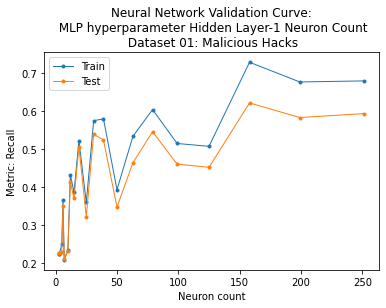

In [94]:
train_scores_mean = np.mean(mlp_train_scores, axis=1)
train_scores_std = np.std(mlp_train_scores, axis=1)
test_scores_mean = np.mean(mlp_test_scores, axis=1)
test_scores_std = np.std(mlp_test_scores, axis=1)
print (variable_layers_size.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':variable_layers_size,'train':train_scores_mean,'test':test_scores_mean})
print(df_1)

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=1, marker='.')
axs.plot(df_1['x'], df_1['test'], label='Test', linewidth=1, marker='.')
axs.legend(); axs.set_ylabel("Metric: Recall"); axs.set_xlabel("Neuron count")
axs.set_title('Neural Network Validation Curve:\n MLP hyperparameter Hidden Layer-1 Neuron Count\n Dataset 01: Malicious Hacks')

## Hyperparam Alpha

In [95]:
range_list = np.linspace(0.00005, 0.001,15)
range_list

array([5.00000000e-05, 1.17857143e-04, 1.85714286e-04, 2.53571429e-04,
       3.21428571e-04, 3.89285714e-04, 4.57142857e-04, 5.25000000e-04,
       5.92857143e-04, 6.60714286e-04, 7.28571429e-04, 7.96428571e-04,
       8.64285714e-04, 9.32142857e-04, 1.00000000e-03])

In [96]:
mlp_train_scores, mlp_test_scores = validation_curve(
    mlp_target, X, y, param_name="alpha", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

In [99]:

train_scores_mean = np.mean(mlp_train_scores, axis=1)
train_scores_std = np.std(mlp_train_scores, axis=1)
test_scores_mean = np.mean(mlp_test_scores, axis=1)
test_scores_std = np.std(mlp_test_scores, axis=1)
print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )
df_1

(15,) (15,) (15,)


,x,train,test
0,0.000050,0.641386,0.554307
1,0.000118,0.656835,0.573034
2,0.000186,0.741105,0.641386
3,0.000254,0.530899,0.464419
4,0.000321,0.717697,0.626404
5,0.000389,0.719101,0.631086
6,0.000457,0.606273,0.522472
7,0.000525,0.616573,0.528090
8,0.000593,0.662921,0.584270
9,0.000661,0.566011,0.488764


Text(0.5, 1.0, 'Neural Network Validation Curve:\n MLP hyperparameter Hidden Layer-1 Alpha\n Dataset 01: Malicious Hacks')

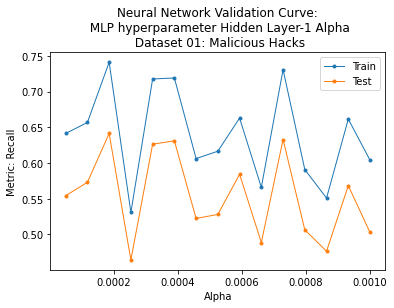

In [100]:

axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=1, marker='.')
axs.plot(df_1['x'], df_1['test'], label='Test', linewidth=1, marker='.')
axs.legend(); axs.set_ylabel("Metric: Recall"); axs.set_xlabel("Alpha")
axs.set_title('Neural Network Validation Curve:\n MLP hyperparameter Hidden Layer-1 Alpha\n Dataset 01: Malicious Hacks')

## Try activation hyper param


In [101]:
# activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
range_list=['identity', 'logistic', 'tanh', 'relu']
mlp_train_scores, mlp_test_scores = validation_curve(
    mlp_target, X, y, param_name="activation", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

In [102]:
range_list=['identity', 'logistic', 'tanh', 'relu']
train_scores_mean = np.mean(mlp_train_scores, axis=1)
test_scores_mean = np.mean(mlp_test_scores, axis=1)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )
df_1

,x,train,test
0,identity,0.098315,0.093633
1,logistic,0.820693,0.716292
2,tanh,0.757491,0.632022
3,relu,0.727996,0.620787


## Iteration graph

array([[0.        , 0.69230769, 0.65384615, ..., 0.79310345, 0.20422535,
        0.72      ],
       [0.14285714, 0.71153846, 0.71153846, ..., 0.88793103, 1.        ,
        0.68      ],
       [0.        , 0.05769231, 0.03846154, ..., 0.94827586, 0.65492958,
        0.68      ],
       ...,
       [0.        , 0.48076923, 0.48076923, ..., 0.0862069 , 0.20422535,
        0.36      ],
       [0.        , 0.75      , 0.75      , ..., 0.96551724, 0.72535211,
        0.86      ],
       [1.        , 0.69230769, 0.65384615, ..., 0.79310345, 0.20422535,
        0.68      ]])

In [112]:
## Plot iterations

range_list = np.linspace(1, 600, 15).astype('int32')
range_list

array([  1,  43,  86, 129, 172, 214, 257, 300, 343, 386, 428, 471, 514,
       557, 600], dtype=int32)

In [104]:
mlp_train_scores, mlp_test_scores = validation_curve(
    mlp_target, X, y, param_name="max_iter", param_range=range_list,
    scoring=scorer, cv=strat_cv, n_jobs=-1)

/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (43) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (86) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/sdodge/work/omscs/cs7641/cs7641_assignments/env3.9.7/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic 

In [105]:

train_scores_mean = np.mean(mlp_train_scores, axis=1)
test_scores_mean = np.mean(mlp_test_scores, axis=1)
print (range_list.shape,train_scores_mean.shape,test_scores_mean.shape)
df_1 = pd.DataFrame({'x':range_list,'train':train_scores_mean,'test':test_scores_mean} )
df_1

(15,) (15,) (15,)


,x,train,test
0,1,0.000000,0.000000
1,43,0.399813,0.353933
2,86,0.504213,0.438202
3,129,0.649813,0.564607
4,172,0.727996,0.620787
5,214,0.727996,0.620787
6,257,0.727996,0.620787
7,300,0.727996,0.620787
8,343,0.727996,0.620787
9,386,0.727996,0.620787


Text(0.5, 1.0, 'Neural Network Iterations Curve')

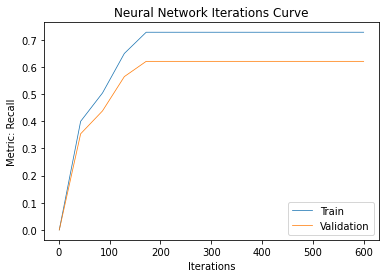

In [110]:
axs = plt.gca()
axs.plot(df_1['x'], df_1['train'], label='Train', linewidth=0.75)
axs.plot(df_1['x'], df_1['test'], label='Validation', linewidth=0.75)
axs.legend(); axs.set_ylabel("Metric: Recall"); axs.set_xlabel("Iterations")
axs.set_title('Neural Network Iterations Curve')


In [109]:
scorer

make_scorer(recall_score)